In [2]:
from math import sin, exp
import numpy as np

In [3]:
def f(x): # функция, которую аппроксимируем
    return np.sin(x / 5.0)*np.exp(x / 10.0) + 5*np.exp( -x / 2 )

In [64]:
f(8.0)

2.316170159053224

In [23]:
x = np.linspace(1.0, 15.0)
y = f(x)

In [24]:
x

array([ 1.        ,  1.28571429,  1.57142857,  1.85714286,  2.14285714,
        2.42857143,  2.71428571,  3.        ,  3.28571429,  3.57142857,
        3.85714286,  4.14285714,  4.42857143,  4.71428571,  5.        ,
        5.28571429,  5.57142857,  5.85714286,  6.14285714,  6.42857143,
        6.71428571,  7.        ,  7.28571429,  7.57142857,  7.85714286,
        8.14285714,  8.42857143,  8.71428571,  9.        ,  9.28571429,
        9.57142857,  9.85714286, 10.14285714, 10.42857143, 10.71428571,
       11.        , 11.28571429, 11.57142857, 11.85714286, 12.14285714,
       12.42857143, 12.71428571, 13.        , 13.28571429, 13.57142857,
       13.85714286, 14.14285714, 14.42857143, 14.71428571, 15.        ])

In [25]:
y

array([3.25221687, 2.91815167, 2.64071099, 2.41260532, 2.22747808,
       2.07977833, 1.96465044, 1.87783842, 1.815603  , 1.7746498 ,
       1.75206708, 1.74527186, 1.75196323, 1.77008207, 1.7977761 ,
       1.83336985, 1.87533865, 1.92228633, 1.97292598, 2.02606361,
       2.08058403, 2.13543898, 2.18963705, 2.24223523, 2.29233184,
       2.33906082, 2.381587  , 2.41910245, 2.45082365, 2.47598943,
       2.49385963, 2.50371435, 2.50485372, 2.49659825, 2.47828951,
       2.44929128, 2.40899106, 2.35680183, 2.29216418, 2.21454864,
       2.12345826, 2.0184314 , 1.89904466, 1.76491604, 1.61570811,
       1.45113145, 1.270948  , 1.07497462, 0.86308665, 0.63522142])

In [26]:
%matplotlib inline
from matplotlib import pylab as plt

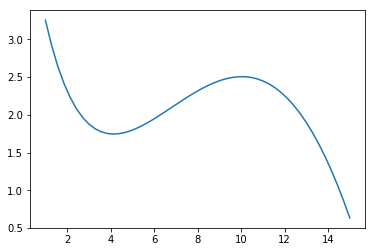

In [27]:
plt.plot(x, y)
plt.show()

### Приближение многочленом первой степени (прямой)

In [31]:
# Выбираем точки
x1 = 1.0
x2 = 15.0

In [32]:
A = np.array([[1.0, x1],[1.0, x2]])
print(A)

[[ 1.  1.]
 [ 1. 15.]]


In [34]:
b = np.array([f(x1), f(x2)])
print(b)

[3.25221687 0.63522142]


In [35]:
import scipy.linalg

In [36]:
w = scipy.linalg.solve(A, b)
print(w)

[ 3.43914511 -0.18692825]


In [54]:
def linf(x, w): # w - массив коэффициентов многочлена
    #print w[1]*x+w[0]
    return w[1]*x+w[0]

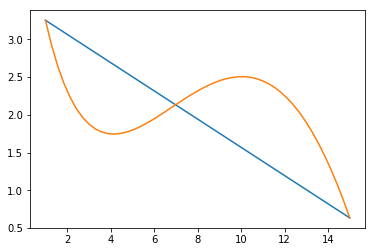

In [55]:
# z - массив с Y-ками, которые получились от многочлена первой степени, его иксов и коэффициентов
z = linf(x, w)
plt.plot(x, z)
plt.plot(x, y)
plt.show()

### Приближение многочленом второй степени (параболой)

In [71]:
# Выбираем точки
x1 = 1.0
x2 = 8.0
x3 = 15.0

In [72]:
A = np.array([[1, x1, x1 ** 2],[1, x2, x2 ** 2],[1, x3, x3 ** 2]])
print(A)

[[  1.   1.   1.]
 [  1.   8.  64.]
 [  1.  15. 225.]]


In [73]:
b = np.array([f(x1), f(x2), f(x3)])
print(b)

[3.25221687 2.31617016 0.63522142]


In [74]:
w = scipy.linalg.solve(A, b)
print(w)

[ 3.32512949 -0.06531159 -0.00760104]


In [75]:
def sqf(x, w):
    return w[0]+w[1] * x + w[2] * (x ** 2)

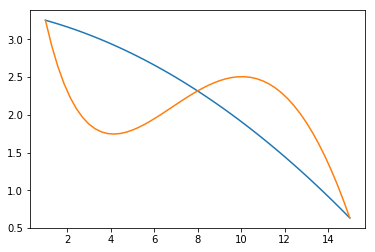

In [76]:
z = sqf(x, w)
plt.plot(x, z)
plt.plot(x, y)
plt.show()

### Приближение многочленом третьей степени (кубической параболой)

In [81]:
# Выбираем точки
x1 = 1.0
x2 = 4.0
x3 = 10.0
x4 = 15.0

In [82]:
A = np.array([[1, x1, x1 ** 2, x1 ** 3],[1, x2, x2 ** 2, x2 ** 3],[1, x3, x3 ** 2, x3 ** 3], [1, x4, x4 ** 2, x4 ** 3]])
print(A)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]


In [84]:
b = np.array([f(x1), f(x2), f(x3), f(x4)])
print(b)

[3.25221687 1.74684595 2.50541641 0.63522142]


In [85]:
w = scipy.linalg.solve(A, b)
print(w)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [89]:
print(np.round(w, decimals=2))

[ 4.36 -1.3   0.19 -0.01]


In [86]:
def trf(x, w):
    return w[0]+w[1] * x + w[2] * (x ** 2) + w[3] * (x ** 3)

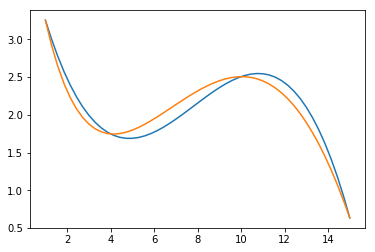

In [87]:
z = trf(x, w)
plt.plot(x, z)
plt.plot(x, y)
plt.show()